In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv(r"C:\Users\user\Downloads\retail_store_inventory.csv"
                 )

In [3]:
ds.head(3)

,Date,Product ID,Category,Region,Inventory Level,Units Sold,Price,Holiday/Promotion,Competitor Pricing,Seasonality
0,01-01-2022,P0001,Groceries,North,231,127,33.50,0,29.69,Autumn
1,01-01-2022,P0002,Toys,South,204,150,63.01,0,66.16,Autumn
2,01-01-2022,P0003,Toys,West,102,65,27.99,1,31.32,Summer


In [4]:
crr = ds.select_dtypes(include=["int64", "float64"])

<Axes: >

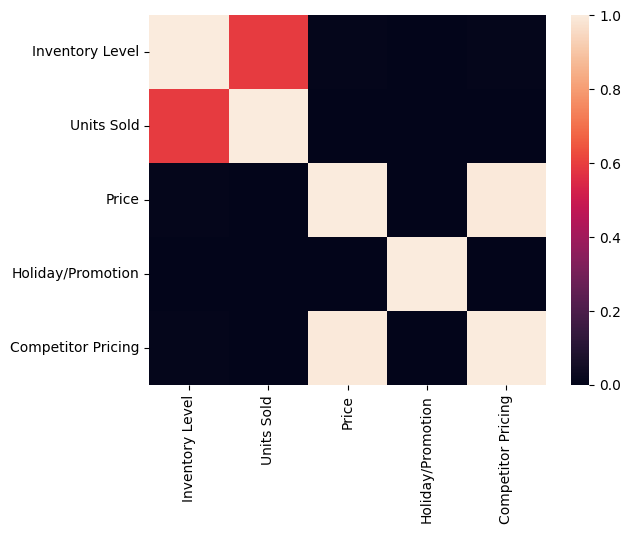

In [5]:
crr_check = crr.corr()
sns.heatmap(crr_check)

In [6]:
crr_check.corr()

,Inventory Level,Units Sold,Price,Holiday/Promotion,Competitor Pricing
Inventory Level,1.000000,0.798643,-0.624860,-0.391372,-0.624517
Units Sold,0.798643,1.000000,-0.631612,-0.390080,-0.631290
Price,-0.624860,-0.631612,1.000000,-0.409546,0.999968
Holiday/Promotion,-0.391372,-0.390080,-0.409546,1.000000,-0.409974
Competitor Pricing,-0.624517,-0.631290,0.999968,-0.409974,1.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Product ID          73100 non-null  object 
 2   Category            73100 non-null  object 
 3   Region              73100 non-null  object 
 4   Inventory Level     73100 non-null  int64  
 5   Units Sold          73100 non-null  int64  
 6   Price               73100 non-null  float64
 7   Holiday/Promotion   73100 non-null  int64  
 8   Competitor Pricing  73100 non-null  float64
 9   Seasonality         73100 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.6+ MB


In [8]:
ds.rename(columns={"Holiday/Promotion":"Promotion"},inplace= True )

In [9]:
ds.drop_duplicates(inplace=True)
ds.shape

(73100, 10)

In [10]:
ds.drop(["Product ID"],inplace=True,axis=1)

In [11]:
ds.drop(['Competitor Pricing'], axis=1, inplace=True)

In [12]:
ds.drop_duplicates(inplace= True)

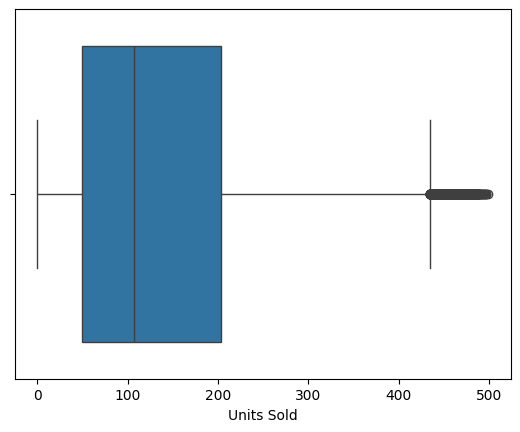

In [13]:
plt.Figure(figsize=(100, 5))
sns.boxplot(x = ds["Units Sold"],)
plt.show()

In [14]:
q1 = ds["Units Sold"].quantile(0.25)
q3 = ds["Units Sold"].quantile(0.75)

iqr = q3 - q1

min_range = q1 - 1.5 *iqr
max_range = q3 + 1.5 * iqr

ds = ds[(ds["Units Sold"]<= max_range)]



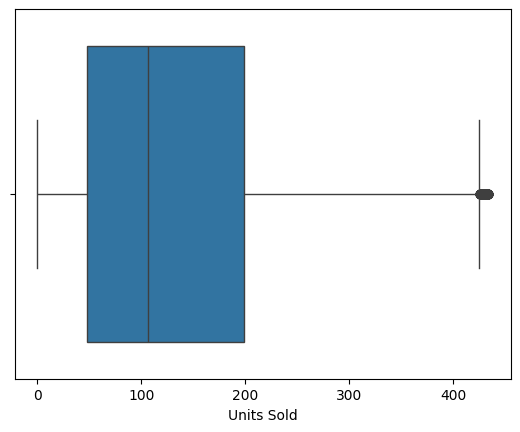

In [15]:
sns.boxplot(x = ds["Units Sold"])
plt.show()

In [16]:
ds.head(3)

,Date,Category,Region,Inventory Level,Units Sold,Price,Promotion,Seasonality
0,01-01-2022,Groceries,North,231,127,33.50,0,Autumn
1,01-01-2022,Toys,South,204,150,63.01,0,Autumn
2,01-01-2022,Toys,West,102,65,27.99,1,Summer


In [17]:
#freq_map = ds['Product ID'].value_counts(normalize=True)
#ds['Product ID'] = ds['Product ID'].map(freq_map)


OnehotEncoding


In [18]:
encode = ds[["Category", "Region", "Seasonality"]]

In [19]:
pd.get_dummies(encode).info()

<class 'pandas.core.frame.DataFrame'>
Index: 72385 entries, 0 to 73099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Category_Clothing     72385 non-null  bool 
 1   Category_Electronics  72385 non-null  bool 
 2   Category_Furniture    72385 non-null  bool 
 3   Category_Groceries    72385 non-null  bool 
 4   Category_Toys         72385 non-null  bool 
 5   Region_East           72385 non-null  bool 
 6   Region_North          72385 non-null  bool 
 7   Region_South          72385 non-null  bool 
 8   Region_West           72385 non-null  bool 
 9   Seasonality_Autumn    72385 non-null  bool 
 10  Seasonality_Spring    72385 non-null  bool 
 11  Seasonality_Summer    72385 non-null  bool 
 12  Seasonality_Winter    72385 non-null  bool 
dtypes: bool(13)
memory usage: 1.4 MB


In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop= "first", sparse_output= False)
arr = ohe.fit_transform(encode)

In [21]:
encoded = pd.DataFrame(arr, columns=ohe.get_feature_names_out(), index=ds.index)

In [22]:
ds = pd.concat([ds, encoded], axis=1)
ds.drop(["Category", "Region", "Seasonality"], axis= 1, inplace= True)

In [23]:
#ds.astype("Float64", errors= "ignore")

In [24]:
ds.shape

(72385, 15)

In [25]:
import pandas as pd
import numpy as np

ds['Date'] = pd.to_datetime(ds['Date'], dayfirst=False, errors='coerce')

ds.dropna(subset=['Date'], inplace=True)

ds['Year'] = ds['Date'].dt.year
ds['Month'] = ds['Date'].dt.month
ds['Day'] = ds['Date'].dt.day

ds['Month'] = np.sin(2 * np.pi * ds['Month']/12)
ds['Month'] = np.cos(2 * np.pi * ds['Month']/12)

ds.drop('Date', axis=1, inplace=True)

ds = ds.astype(int, errors='ignore')

print("Final Shape:", ds.shape)
print("\n--- First 3 Rows ---")
print(ds.head(3))




Final Shape: (28624, 17)

--- First 3 Rows ---
   Inventory Level  Units Sold  Price  Promotion  Category_Electronics  \
0              231         127     33          0                     0   
1              204         150     63          0                     0   
2              102          65     27          1                     0   

   Category_Furniture  Category_Groceries  Category_Toys  Region_North  \
0                   0                   1              0             1   
1                   0                   0              1             0   
2                   0                   0              1             0   

   Region_South  Region_West  Seasonality_Spring  Seasonality_Summer  \
0             0            0                   0                   0   
1             1            0                   0                   0   
2             0            1                   0                   1   

   Seasonality_Winter  Year  Month  Day  
0                   0  2022 

In [26]:
ds.head(3)

,Inventory Level,Units Sold,Price,Promotion,Category_Electronics,Category_Furniture,Category_Groceries,Category_Toys,Region_North,Region_South,Region_West,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Year,Month,Day
0,231,127,33,0,0,0,1,0,1,0,0,0,0,0,2022,0,1
1,204,150,63,0,0,0,0,1,0,1,0,0,0,0,2022,0,1
2,102,65,27,1,0,0,0,1,0,0,1,0,1,0,2022,0,1


x and y split


In [27]:

y = ds["Units Sold"].values
x = ds.drop("Units Sold", axis=1)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [29]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
train_s=st.fit_transform(x_train)
test_s =st.transform(x_test)
#x = pd.DataFrame(sst_s, columns=x.columns)

In [30]:
x_train_f =pd.DataFrame(train_s,columns=x.columns)
x_test_f = pd.DataFrame(test_s, columns=x.columns)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rd = RandomForestRegressor(n_estimators=100,
    criterion = "squared_error",
    max_depth =5,
    min_samples_split= 2,
    )
rd.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
rd.score(x_test, y_test)*100, rd.score(x_train, y_train)*100

(34.3987157113163, 34.12231635762131)

In [33]:
import pandas as pd
# टॉप फीचर्स देखें
feature_imp = pd.Series(rd.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_imp.head(10))


Inventory Level         0.984372
Price                   0.007007
Day                     0.003146
Category_Electronics    0.000627
Year                    0.000587
Category_Groceries      0.000581
Region_West             0.000491
Promotion               0.000409
Region_South            0.000405
Seasonality_Winter      0.000388
dtype: float64


In [34]:
rd.score(x_test, y_test), rd.score(x_train, y_train)

(0.34398715711316297, 0.3412231635762131)

In [35]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rd.predict(x_test)))

66.71937285749898


In [36]:
from sklearn.model_selection import RandomizedSearchCV
para = {
     "n_estimators":[50, 100, 200, 300], 
     "max_depth":[5, 10, 20, 30], 
     "min_samples_split": [4,8, 15, 20]
}


rs = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=para,
    n_iter= 10,
    n_jobs=-1,
    cv =5)

rs.fit(x_train, y_train)

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 10, ...], 'min_samples_split': [4, 8, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [37]:
rs.score(x_train, y_train)*100, rs.score(x_test, y_test)*100

(34.124346328372745, 34.44897335414271)

In [38]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rs.predict(x_test)))

66.68239266387461


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, rd.predict(x_test)))
#print(mean_squared_error(y_test, dt(x_test)))
#print(np.square(mean_squared_error(y_test, lr(x_test))))

66.71937285749898


In [40]:
from sklearn.model_selection import cross_val_score
corss = cross_val_score(rs,x,y, cv=5)

In [41]:
corss

array([0.32843877, 0.34278233, 0.32563192, 0.33746747, 0.33903887])

--- Top 10 Predictions Comparison ---
   Actual Units Sold  Predicted Units Sold  Difference (Error)
0                 34                 97.94              -63.94
1                 67                118.16              -51.16
2                371                197.34              173.66
3                414                217.42              196.58
4                121                168.53              -47.53
5                184                100.46               83.54
6                 13                 50.41              -37.41
7                305                186.24              118.76
8                407                220.31              186.69
9                151                172.20              -21.20


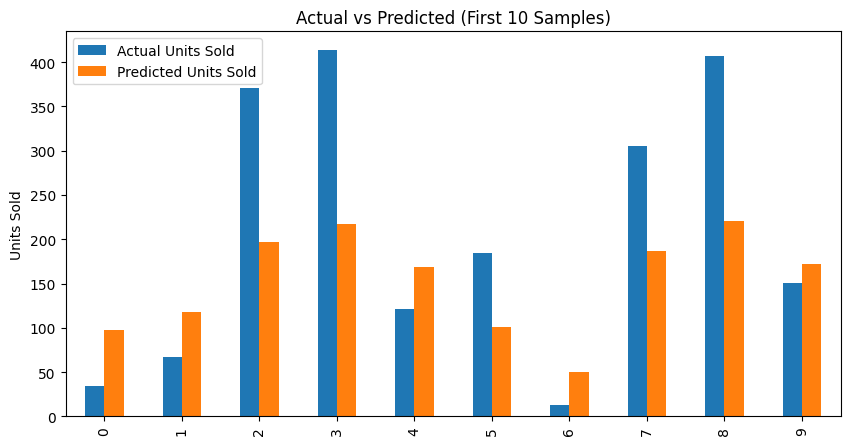

In [42]:
import pandas as pd

y_pred = rs.predict(x_test)

comparison_df = pd.DataFrame({
    'Actual Units Sold': y_test[:10],
    'Predicted Units Sold': y_pred[:10].round(2),
    'Difference (Error)': (y_test[:10] - y_pred[:10]).round(2)
})

print("--- Top 10 Predictions Comparison ---")
print(comparison_df)

import matplotlib.pyplot as plt

comparison_df[['Actual Units Sold', 'Predicted Units Sold']].plot(kind='bar', figsize=(10,5))
plt.title('Actual vs Predicted (First 10 Samples)')
plt.ylabel('Units Sold')
plt.show()
